In [1]:
#importing libraries
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [2]:
dataset = pd.read_csv(r'C:\Users\HP\Downloads\sample.csv')
 
dataset.head(10)

# dataset.dtypes

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738.0,HY411648,9/5/2015 13:30,043XX S WOOD ST,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,61.0,08B,1165074.0,1875917.0,2015.0,2/10/2018 15:50,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739.0,HY411615,9/4/2015 11:30,008XX N CENTRAL AVE,870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29.0,25.0,6,1138875.0,1904869.0,2015.0,2/10/2018 15:50,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166.0,JC213529,9/1/2018 0:01,082XX S INGLESIDE AVE,810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,6,NaN,NaN,2018.0,4/6/2019 16:04,NaN,NaN,NaN
3,10224740.0,HY411595,9/5/2015 12:45,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35.0,21.0,18,1152037.0,1920384.0,2015.0,2/10/2018 15:50,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741.0,HY411610,9/5/2015 13:00,0000X N LARAMIE AVE,560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28.0,25.0,08A,1141706.0,1900086.0,2015.0,2/10/2018 15:50,41.881903,-87.755121,"(41.881903443, -87.755121152)"
5,10224742.0,HY411435,9/5/2015 10:55,082XX S LOOMIS BLVD,610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,...,21.0,71.0,5,1168430.0,1850165.0,2015.0,2/10/2018 15:50,41.744379,-87.658431,"(41.744378879, -87.658430635)"
6,10224743.0,HY411629,9/4/2015 18:00,021XX W CHURCHILL ST,620,BURGLARY,UNLAWFUL ENTRY,RESIDENCE-GARAGE,False,False,...,32.0,24.0,5,1161628.0,1912157.0,2015.0,2/10/2018 15:50,41.914636,-87.681631,"(41.914635603, -87.681630909)"
7,10224744.0,HY411605,9/5/2015 13:00,025XX W CERMAK RD,860,THEFT,RETAIL THEFT,GROCERY FOOD STORE,True,False,...,25.0,31.0,6,1159734.0,1889313.0,2015.0,9/17/2015 11:37,41.851989,-87.689219,"(41.851988885, -87.689219118)"
8,10224745.0,HY411654,9/5/2015 11:30,031XX W WASHINGTON BLVD,320,ROBBERY,STRONGARM - NO WEAPON,STREET,False,True,...,27.0,27.0,3,1155536.0,1900515.0,2015.0,2/10/2018 15:50,41.882814,-87.704326,"(41.88281374, -87.704325717)"
9,11645836.0,JC212333,5/1/2016 0:25,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,15.0,63.0,11,NaN,NaN,2016.0,4/6/2019 16:04,NaN,NaN,NaN


In [3]:
# droping the features that are not usefull
dataset=dataset.drop(columns=['ID','Case Number','Description','Updated On','Block'])
# X.shape

print('Columns in dataset: ', dataset.columns)


dataset.shape


Columns in dataset:  Index(['Date', 'IUCR', 'Primary Type', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')


(23000, 17)

In [4]:
# droping the null value enteries drop null 
dataset.dropna(inplace=True)
dataset

,Date,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
0,9/5/2015 13:30,486,BATTERY,RESIDENCE,False,True,924.0,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015.0,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,9/4/2015 11:30,870,THEFT,CTA BUS,False,False,1511.0,15.0,29.0,25.0,6,1138875.0,1904869.0,2015.0,41.895080,-87.765400,"(41.895080471, -87.765400451)"
3,9/5/2015 12:45,2023,NARCOTICS,SIDEWALK,True,False,1412.0,14.0,35.0,21.0,18,1152037.0,1920384.0,2015.0,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,9/5/2015 13:00,560,ASSAULT,APARTMENT,False,True,1522.0,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015.0,41.881903,-87.755121,"(41.881903443, -87.755121152)"
5,9/5/2015 10:55,610,BURGLARY,RESIDENCE,False,False,614.0,6.0,21.0,71.0,5,1168430.0,1850165.0,2015.0,41.744379,-87.658431,"(41.744378879, -87.658430635)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,9/6/2015 21:00,1330,CRIMINAL TRESPASS,PARK PROPERTY,True,False,1224.0,12.0,27.0,28.0,26,1166342.0,1901369.0,2015.0,41.884933,-87.664621,"(41.884932988, -87.664621314)"
996,9/6/2015 15:00,4387,OTHER OFFENSE,RESIDENCE,True,True,1531.0,15.0,37.0,25.0,26,1141506.0,1906350.0,2015.0,41.899096,-87.755701,"(41.899096313, -87.755700717)"
997,9/6/2015 20:00,486,BATTERY,APARTMENT,False,True,2523.0,25.0,31.0,20.0,08B,1146496.0,1920611.0,2015.0,41.938136,-87.737008,"(41.938136244, -87.737008169)"
998,9/5/2015 19:00,1320,CRIMINAL DAMAGE,STREET,False,False,1235.0,12.0,25.0,31.0,14,1168363.0,1890056.0,2015.0,41.853846,-87.657527,"(41.85384576, -87.657526977)"


In [5]:
# Before removing Null values 1048575

# After removing Null value 1015247

# Total Null values removed 33328

In [6]:
# ignore latitude and logitude outside of the chicago
dataset=dataset[(dataset["Latitude"] < 45)
             & (dataset["Latitude"] > 40)
             & (dataset["Longitude"] < -85)
             & (dataset["Longitude"] > -90)]
dataset

,Date,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
0,9/5/2015 13:30,486,BATTERY,RESIDENCE,False,True,924.0,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015.0,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,9/4/2015 11:30,870,THEFT,CTA BUS,False,False,1511.0,15.0,29.0,25.0,6,1138875.0,1904869.0,2015.0,41.895080,-87.765400,"(41.895080471, -87.765400451)"
3,9/5/2015 12:45,2023,NARCOTICS,SIDEWALK,True,False,1412.0,14.0,35.0,21.0,18,1152037.0,1920384.0,2015.0,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,9/5/2015 13:00,560,ASSAULT,APARTMENT,False,True,1522.0,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015.0,41.881903,-87.755121,"(41.881903443, -87.755121152)"
5,9/5/2015 10:55,610,BURGLARY,RESIDENCE,False,False,614.0,6.0,21.0,71.0,5,1168430.0,1850165.0,2015.0,41.744379,-87.658431,"(41.744378879, -87.658430635)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,9/6/2015 21:00,1330,CRIMINAL TRESPASS,PARK PROPERTY,True,False,1224.0,12.0,27.0,28.0,26,1166342.0,1901369.0,2015.0,41.884933,-87.664621,"(41.884932988, -87.664621314)"
996,9/6/2015 15:00,4387,OTHER OFFENSE,RESIDENCE,True,True,1531.0,15.0,37.0,25.0,26,1141506.0,1906350.0,2015.0,41.899096,-87.755701,"(41.899096313, -87.755700717)"
997,9/6/2015 20:00,486,BATTERY,APARTMENT,False,True,2523.0,25.0,31.0,20.0,08B,1146496.0,1920611.0,2015.0,41.938136,-87.737008,"(41.938136244, -87.737008169)"
998,9/5/2015 19:00,1320,CRIMINAL DAMAGE,STREET,False,False,1235.0,12.0,25.0,31.0,14,1168363.0,1890056.0,2015.0,41.853846,-87.657527,"(41.85384576, -87.657526977)"


In [7]:
# # listing the crimes category wise with their counts
types=dataset['Primary Type'].value_counts().sort_values(ascending=False)
types

BATTERY                             214
THEFT                               195
CRIMINAL DAMAGE                     112
NARCOTICS                            91
ASSAULT                              65
OTHER OFFENSE                        47
BURGLARY                             41
MOTOR VEHICLE THEFT                  31
DECEPTIVE PRACTICE                   31
ROBBERY                              30
CRIMINAL TRESPASS                    28
WEAPONS VIOLATION                    16
OFFENSE INVOLVING CHILDREN           10
INTERFERENCE WITH PUBLIC OFFICER      9
PUBLIC PEACE VIOLATION                8
CRIM SEXUAL ASSAULT                   5
GAMBLING                              4
SEX OFFENSE                           3
LIQUOR LAW VIOLATION                  2
STALKING                              1
PROSTITUTION                          1
ARSON                                 1
Name: Primary Type, dtype: int64

In [8]:
# crime types according to their counts in dataframe
# 15 classes
# major_crimes=['THEFT','BATTERY','CRIMINAL DAMAGE','ASSAULT','OTHER OFFENSE','DECEPTIVE PRACTICE','NARCOTICS','BURGLARY','MOTOR VEHICLE THEFT'
#               ,'ROBBERY','CRIMINAL TRESPASS','WEAPONS VIOLATION','OFFENSE INVOLVING CHILDREN','PUBLIC PEACE VIOLATION','CRIM SEXUAL ASSAULT']
# 8 classes
# storing major crime types according to their counts in dataframe
# major_crimes=['THEFT','BATTERY','CRIMINAL DAMAGE','ASSAULT','OTHER OFFENSE','DECEPTIVE PRACTICE','NARCOTICS','BURGLARY']

In [9]:
# major crime time
#---> Storing Major Crimes
major_crimes=['THEFT','BATTERY','CRIMINAL DAMAGE','ASSAULT']

In [10]:
crime_df = dataset.loc[dataset['Primary Type'] .isin(major_crimes)]
crime_df

,Date,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
0,9/5/2015 13:30,486,BATTERY,RESIDENCE,False,True,924.0,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015.0,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,9/4/2015 11:30,870,THEFT,CTA BUS,False,False,1511.0,15.0,29.0,25.0,6,1138875.0,1904869.0,2015.0,41.895080,-87.765400,"(41.895080471, -87.765400451)"
4,9/5/2015 13:00,560,ASSAULT,APARTMENT,False,True,1522.0,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015.0,41.881903,-87.755121,"(41.881903443, -87.755121152)"
7,9/5/2015 13:00,860,THEFT,GROCERY FOOD STORE,True,False,1034.0,10.0,25.0,31.0,6,1159734.0,1889313.0,2015.0,41.851989,-87.689219,"(41.851988885, -87.689219118)"
10,9/5/2015 14:00,820,THEFT,PARKING LOT/GARAGE(NON.RESID.),False,False,833.0,8.0,13.0,65.0,6,1150938.0,1857056.0,2015.0,41.763648,-87.722345,"(41.763647552, -87.722344693)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,9/6/2015 21:18,560,ASSAULT,SIDEWALK,True,True,831.0,8.0,18.0,66.0,08A,1159624.0,1856621.0,2015.0,41.762280,-87.690520,"(41.762280132, -87.690520283)"
992,9/6/2015 20:30,1320,CRIMINAL DAMAGE,VEHICLE NON-COMMERCIAL,False,False,833.0,8.0,13.0,64.0,14,1145778.0,1859751.0,2015.0,41.771142,-87.741189,"(41.771142119, -87.741189488)"
993,9/6/2015 21:20,560,ASSAULT,SIDEWALK,False,True,832.0,8.0,15.0,66.0,08A,1162216.0,1860566.0,2015.0,41.773052,-87.680911,"(41.773052225, -87.680910521)"
997,9/6/2015 20:00,486,BATTERY,APARTMENT,False,True,2523.0,25.0,31.0,20.0,08B,1146496.0,1920611.0,2015.0,41.938136,-87.737008,"(41.938136244, -87.737008169)"


In [11]:
data = crime_df.pivot_table(index='Year', columns='Primary Type', aggfunc='count')
print(data)

# since we dont have different crimes in early years so we drop data of these years

              Arrest                                   Beat          \
Primary Type ASSAULT BATTERY CRIMINAL DAMAGE  THEFT ASSAULT BATTERY   
Year                                                                  
2015.0          63.0   212.0           110.0  191.0    63.0   212.0   
2019.0           1.0     2.0             2.0    3.0     1.0     2.0   
2020.0           1.0     NaN             NaN    1.0     1.0     NaN   

                                    Community Area          ...  \
Primary Type CRIMINAL DAMAGE  THEFT        ASSAULT BATTERY  ...   
Year                                                        ...   
2015.0                 110.0  191.0           63.0   212.0  ...   
2019.0                   2.0    3.0            1.0     2.0  ...   
2020.0                   NaN    1.0            1.0     NaN  ...   

                        Ward        X Coordinate                          \
Primary Type CRIMINAL DAMAGE  THEFT      ASSAULT BATTERY CRIMINAL DAMAGE   
Year              

In [12]:
# selecting the dataset which starts from 2015
crime_df=crime_df[crime_df['Year']>=2015]
crime_df

,Date,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
0,9/5/2015 13:30,486,BATTERY,RESIDENCE,False,True,924.0,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015.0,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,9/4/2015 11:30,870,THEFT,CTA BUS,False,False,1511.0,15.0,29.0,25.0,6,1138875.0,1904869.0,2015.0,41.895080,-87.765400,"(41.895080471, -87.765400451)"
4,9/5/2015 13:00,560,ASSAULT,APARTMENT,False,True,1522.0,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015.0,41.881903,-87.755121,"(41.881903443, -87.755121152)"
7,9/5/2015 13:00,860,THEFT,GROCERY FOOD STORE,True,False,1034.0,10.0,25.0,31.0,6,1159734.0,1889313.0,2015.0,41.851989,-87.689219,"(41.851988885, -87.689219118)"
10,9/5/2015 14:00,820,THEFT,PARKING LOT/GARAGE(NON.RESID.),False,False,833.0,8.0,13.0,65.0,6,1150938.0,1857056.0,2015.0,41.763648,-87.722345,"(41.763647552, -87.722344693)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,9/6/2015 21:18,560,ASSAULT,SIDEWALK,True,True,831.0,8.0,18.0,66.0,08A,1159624.0,1856621.0,2015.0,41.762280,-87.690520,"(41.762280132, -87.690520283)"
992,9/6/2015 20:30,1320,CRIMINAL DAMAGE,VEHICLE NON-COMMERCIAL,False,False,833.0,8.0,13.0,64.0,14,1145778.0,1859751.0,2015.0,41.771142,-87.741189,"(41.771142119, -87.741189488)"
993,9/6/2015 21:20,560,ASSAULT,SIDEWALK,False,True,832.0,8.0,15.0,66.0,08A,1162216.0,1860566.0,2015.0,41.773052,-87.680911,"(41.773052225, -87.680910521)"
997,9/6/2015 20:00,486,BATTERY,APARTMENT,False,True,2523.0,25.0,31.0,20.0,08B,1146496.0,1920611.0,2015.0,41.938136,-87.737008,"(41.938136244, -87.737008169)"


In [13]:
temp=crime_df.copy()
temp

,Date,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
0,9/5/2015 13:30,486,BATTERY,RESIDENCE,False,True,924.0,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015.0,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,9/4/2015 11:30,870,THEFT,CTA BUS,False,False,1511.0,15.0,29.0,25.0,6,1138875.0,1904869.0,2015.0,41.895080,-87.765400,"(41.895080471, -87.765400451)"
4,9/5/2015 13:00,560,ASSAULT,APARTMENT,False,True,1522.0,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015.0,41.881903,-87.755121,"(41.881903443, -87.755121152)"
7,9/5/2015 13:00,860,THEFT,GROCERY FOOD STORE,True,False,1034.0,10.0,25.0,31.0,6,1159734.0,1889313.0,2015.0,41.851989,-87.689219,"(41.851988885, -87.689219118)"
10,9/5/2015 14:00,820,THEFT,PARKING LOT/GARAGE(NON.RESID.),False,False,833.0,8.0,13.0,65.0,6,1150938.0,1857056.0,2015.0,41.763648,-87.722345,"(41.763647552, -87.722344693)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,9/6/2015 21:18,560,ASSAULT,SIDEWALK,True,True,831.0,8.0,18.0,66.0,08A,1159624.0,1856621.0,2015.0,41.762280,-87.690520,"(41.762280132, -87.690520283)"
992,9/6/2015 20:30,1320,CRIMINAL DAMAGE,VEHICLE NON-COMMERCIAL,False,False,833.0,8.0,13.0,64.0,14,1145778.0,1859751.0,2015.0,41.771142,-87.741189,"(41.771142119, -87.741189488)"
993,9/6/2015 21:20,560,ASSAULT,SIDEWALK,False,True,832.0,8.0,15.0,66.0,08A,1162216.0,1860566.0,2015.0,41.773052,-87.680911,"(41.773052225, -87.680910521)"
997,9/6/2015 20:00,486,BATTERY,APARTMENT,False,True,2523.0,25.0,31.0,20.0,08B,1146496.0,1920611.0,2015.0,41.938136,-87.737008,"(41.938136244, -87.737008169)"


In [14]:
# getting the half of our data set for random data selection
nrows= temp.shape[0]
portion=math.floor(nrows/3)
portion

195

In [15]:
first=temp.iloc[0:portion,:]
first.shape

(195, 17)

In [16]:
nextp=portion+portion+1
scnd=temp.iloc[(portion+1):nextp,:]
scnd.shape

(195, 17)

In [17]:
finalp=nextp+portion+1
third=temp.iloc[(nextp+1):finalp,:]
third.shape


(194, 17)

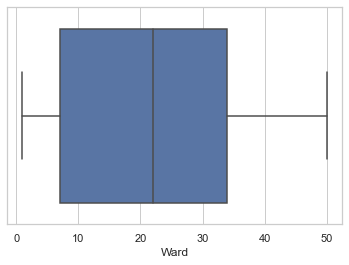

In [20]:
# picking random 5k enteries from the first part
index=np.random.choice(portion,size = 2000)
df_frst=first.iloc[index]
df_frst.shape
sns.set_theme(style="whitegrid")

ax = sns.boxplot(x=df_frst["Ward"])

In [24]:
# picking random 5k enteries from the second half

index=np.random.choice(portion,size = 2000)
df_scnd=scnd.iloc[index]
df_scnd


,Date,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
413,9/6/2015 2:00,420,BATTERY,SIDEWALK,False,False,1123.0,11.0,28.0,27.0,04B,1153006.0,1901570.0,2015.0,41.885759,-87.713588,"(41.885759278, -87.713588042)"
350,9/5/2015 23:52,1310,CRIMINAL DAMAGE,APARTMENT,False,False,232.0,2.0,20.0,40.0,14,1178137.0,1866990.0,2015.0,41.790334,-87.622354,"(41.790334078, -87.622353626)"
428,9/5/2015 3:46,1310,CRIMINAL DAMAGE,APARTMENT,False,True,1215.0,12.0,27.0,24.0,14,1165229.0,1903157.0,2015.0,41.889863,-87.668658,"(41.889863125, -87.668657555)"
479,9/6/2015 3:52,486,BATTERY,APARTMENT,False,True,1135.0,11.0,2.0,27.0,08B,1157822.0,1896479.0,2015.0,41.871692,-87.696041,"(41.871692279, -87.696041461)"
536,9/5/2015 22:00,1310,CRIMINAL DAMAGE,RESIDENCE,False,False,833.0,8.0,13.0,65.0,14,1150530.0,1859616.0,2015.0,41.770681,-87.723774,"(41.770680556, -87.723773624)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,9/6/2015 8:00,460,BATTERY,STREET,False,True,733.0,7.0,6.0,68.0,08B,1172163.0,1858942.0,2015.0,41.768383,-87.644495,"(41.768382919, -87.644495002)"
549,9/5/2015 20:00,1310,CRIMINAL DAMAGE,RESIDENCE,False,False,1814.0,18.0,43.0,7.0,14,1173660.0,1911775.0,2015.0,41.913328,-87.637439,"(41.913327988, -87.637438714)"
464,9/2/2015 2:20,1310,CRIMINAL DAMAGE,RESIDENCE,False,True,624.0,6.0,6.0,69.0,14,1181871.0,1855111.0,2015.0,41.757651,-87.609029,"(41.757651399, -87.609029009)"
385,9/6/2015 2:55,486,BATTERY,RESIDENCE,False,True,1622.0,16.0,45.0,15.0,08B,1138173.0,1930097.0,2015.0,41.964322,-87.767367,"(41.964321551, -87.767367136)"


In [28]:
# combined all three dataframe

final_df = pd.concat([df_frst,df_scnd],ignore_index=True)
final_df

,Date,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
0,9/5/2015 19:26,1310,CRIMINAL DAMAGE,RESIDENCE,False,True,423.0,4.0,10.0,46.0,14,1196907.0,1847521.0,2015.0,41.736463,-87.554177,"(41.736463265, -87.554176909)"
1,9/5/2015 16:50,860,THEFT,DEPARTMENT STORE,True,False,2533.0,25.0,37.0,25.0,6,1145011.0,1910225.0,2015.0,41.909664,-87.742729,"(41.909664252, -87.742728815)"
2,9/5/2015 16:50,486,BATTERY,RESIDENCE,False,True,2212.0,22.0,19.0,72.0,08B,1163597.0,1834010.0,2015.0,41.700150,-87.676591,"(41.700149617, -87.67659095)"
3,9/1/2015 22:00,890,THEFT,OTHER,False,False,221.0,2.0,3.0,38.0,6,1179716.0,1874171.0,2015.0,41.810003,-87.616344,"(41.810003402, -87.616344268)"
4,9/4/2015 17:00,820,THEFT,STREET,False,False,1423.0,14.0,26.0,24.0,6,1157454.0,1910018.0,2015.0,41.908852,-87.697024,"(41.908852023, -87.697023929)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,9/6/2015 8:00,460,BATTERY,STREET,False,True,733.0,7.0,6.0,68.0,08B,1172163.0,1858942.0,2015.0,41.768383,-87.644495,"(41.768382919, -87.644495002)"
3996,9/5/2015 20:00,1310,CRIMINAL DAMAGE,RESIDENCE,False,False,1814.0,18.0,43.0,7.0,14,1173660.0,1911775.0,2015.0,41.913328,-87.637439,"(41.913327988, -87.637438714)"
3997,9/2/2015 2:20,1310,CRIMINAL DAMAGE,RESIDENCE,False,True,624.0,6.0,6.0,69.0,14,1181871.0,1855111.0,2015.0,41.757651,-87.609029,"(41.757651399, -87.609029009)"
3998,9/6/2015 2:55,486,BATTERY,RESIDENCE,False,True,1622.0,16.0,45.0,15.0,08B,1138173.0,1930097.0,2015.0,41.964322,-87.767367,"(41.964321551, -87.767367136)"


In [29]:
df=final_df.copy()

In [30]:
# Using PCA to combine two features

from sklearn.decomposition import PCA

location = df[['Latitude','Longitude']]
pca = PCA(n_components=1,random_state=123)
locat = pca.fit_transform(location)
df['Location'] = locat
df

,Date,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
0,9/5/2015 19:26,1310,CRIMINAL DAMAGE,RESIDENCE,False,True,423.0,4.0,10.0,46.0,14,1196907.0,1847521.0,2015.0,41.736463,-87.554177,0.150229
1,9/5/2015 16:50,860,THEFT,DEPARTMENT STORE,True,False,2533.0,25.0,37.0,25.0,6,1145011.0,1910225.0,2015.0,41.909664,-87.742729,-0.088256
2,9/5/2015 16:50,486,BATTERY,RESIDENCE,False,True,2212.0,22.0,19.0,72.0,08B,1163597.0,1834010.0,2015.0,41.700150,-87.676591,0.128993
3,9/1/2015 22:00,890,THEFT,OTHER,False,False,221.0,2.0,3.0,38.0,6,1179716.0,1874171.0,2015.0,41.810003,-87.616344,0.056840
4,9/4/2015 17:00,820,THEFT,STREET,False,False,1423.0,14.0,26.0,24.0,6,1157454.0,1910018.0,2015.0,41.908852,-87.697024,-0.067421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,9/6/2015 8:00,460,BATTERY,STREET,False,True,733.0,7.0,6.0,68.0,08B,1172163.0,1858942.0,2015.0,41.768383,-87.644495,0.081834
3996,9/5/2015 20:00,1310,CRIMINAL DAMAGE,RESIDENCE,False,False,1814.0,18.0,43.0,7.0,14,1173660.0,1911775.0,2015.0,41.913328,-87.637439,-0.045231
3997,9/2/2015 2:20,1310,CRIMINAL DAMAGE,RESIDENCE,False,True,624.0,6.0,6.0,69.0,14,1181871.0,1855111.0,2015.0,41.757651,-87.609029,0.107072
3998,9/6/2015 2:55,486,BATTERY,RESIDENCE,False,True,1622.0,16.0,45.0,15.0,08B,1138173.0,1930097.0,2015.0,41.964322,-87.767367,-0.148179


In [31]:
# convertung date column to actual date format
df.Date=pd.to_datetime(df.Date)

df.head(10)

,Date,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
0,2015-09-05 19:26:00,1310,CRIMINAL DAMAGE,RESIDENCE,False,True,423.0,4.0,10.0,46.0,14,1196907.0,1847521.0,2015.0,41.736463,-87.554177,0.150229
1,2015-09-05 16:50:00,860,THEFT,DEPARTMENT STORE,True,False,2533.0,25.0,37.0,25.0,6,1145011.0,1910225.0,2015.0,41.909664,-87.742729,-0.088256
2,2015-09-05 16:50:00,486,BATTERY,RESIDENCE,False,True,2212.0,22.0,19.0,72.0,08B,1163597.0,1834010.0,2015.0,41.700150,-87.676591,0.128993
3,2015-09-01 22:00:00,890,THEFT,OTHER,False,False,221.0,2.0,3.0,38.0,6,1179716.0,1874171.0,2015.0,41.810003,-87.616344,0.056840
4,2015-09-04 17:00:00,820,THEFT,STREET,False,False,1423.0,14.0,26.0,24.0,6,1157454.0,1910018.0,2015.0,41.908852,-87.697024,-0.067421
5,2015-09-05 15:43:00,486,BATTERY,RESIDENCE,False,True,2213.0,22.0,19.0,72.0,08B,1167466.0,1837422.0,2015.0,41.709431,-87.662327,0.126932
6,2015-09-05 22:40:00,460,BATTERY,SIDEWALK,False,False,1732.0,17.0,30.0,16.0,08B,1148964.0,1923628.0,2015.0,41.946368,-87.727859,-0.114677
7,2015-09-05 19:40:00,460,BATTERY,PARK PROPERTY,False,False,1814.0,18.0,43.0,7.0,08B,1176670.0,1911085.0,2015.0,41.911367,-87.626402,-0.038615
8,2015-09-05 16:01:00,486,BATTERY,APARTMENT,True,True,832.0,8.0,15.0,66.0,08B,1160868.0,1859971.0,2015.0,41.771447,-87.685868,0.060882
9,2015-09-05 02:00:00,810,THEFT,SIDEWALK,False,False,1924.0,19.0,44.0,6.0,6,1169247.0,1921430.0,2015.0,41.939919,-87.653370,-0.076118


In [32]:
# extracting month and weekday from date column
df['month']=df.Date.dt.month
df['weekday'] = df.Date.dt.day_of_week
df=df.drop(columns='Date')
df

AttributeError: 'DatetimeProperties' object has no attribute 'day_of_week'

In [33]:
# elif t == 'OTHER OFFENSE': return '5'
    # elif t == 'DECEPTIVE PRACTICE': return '6'
    # elif t == 'NARCOTICS': return '7'
    # elif t == 'BURGLARY': return '8'
    # elif t == 'MOTOR VEHICLE THEFT': return '9'
    # elif t == 'ROBBERY': return '10'
    # elif t == 'CRIMINAL TRESPASS': return '11'
    # elif t == 'WEAPONS VIOLATION': return '12'
    # elif t == 'OFFENSE INVOLVING CHILDREN': return '13'
    # elif t == 'PUBLIC PEACE VIOLATION': return '14'
    # elif t == 'CRIM SEXUAL ASSAULT': return '15'

In [34]:
# assigning crimetype 
def crime_type(t):
    if t =='THEFT': return '1'
    elif t =='BATTERY': return '2'
    elif t =='CRIMINAL DAMAGE': return '3'
    elif t == 'ASSAULT': return '4'
    else: return '0'

cp_crime = df.copy()
cp_crime['crimeType'] = cp_crime['Primary Type'].map(crime_type)
cp_crime

,Date,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,month,crimeType
0,2015-09-05 19:26:00,1310,CRIMINAL DAMAGE,RESIDENCE,False,True,423.0,4.0,10.0,46.0,14,1196907.0,1847521.0,2015.0,41.736463,-87.554177,0.150229,9,3
1,2015-09-05 16:50:00,860,THEFT,DEPARTMENT STORE,True,False,2533.0,25.0,37.0,25.0,6,1145011.0,1910225.0,2015.0,41.909664,-87.742729,-0.088256,9,1
2,2015-09-05 16:50:00,486,BATTERY,RESIDENCE,False,True,2212.0,22.0,19.0,72.0,08B,1163597.0,1834010.0,2015.0,41.700150,-87.676591,0.128993,9,2
3,2015-09-01 22:00:00,890,THEFT,OTHER,False,False,221.0,2.0,3.0,38.0,6,1179716.0,1874171.0,2015.0,41.810003,-87.616344,0.056840,9,1
4,2015-09-04 17:00:00,820,THEFT,STREET,False,False,1423.0,14.0,26.0,24.0,6,1157454.0,1910018.0,2015.0,41.908852,-87.697024,-0.067421,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,2015-09-06 08:00:00,460,BATTERY,STREET,False,True,733.0,7.0,6.0,68.0,08B,1172163.0,1858942.0,2015.0,41.768383,-87.644495,0.081834,9,2
3996,2015-09-05 20:00:00,1310,CRIMINAL DAMAGE,RESIDENCE,False,False,1814.0,18.0,43.0,7.0,14,1173660.0,1911775.0,2015.0,41.913328,-87.637439,-0.045231,9,3
3997,2015-09-02 02:20:00,1310,CRIMINAL DAMAGE,RESIDENCE,False,True,624.0,6.0,6.0,69.0,14,1181871.0,1855111.0,2015.0,41.757651,-87.609029,0.107072,9,3
3998,2015-09-06 02:55:00,486,BATTERY,RESIDENCE,False,True,1622.0,16.0,45.0,15.0,08B,1138173.0,1930097.0,2015.0,41.964322,-87.767367,-0.148179,9,2


In [35]:
labelEncoder = LabelEncoder()

locDes_enc = labelEncoder.fit_transform(cp_crime['Location Description'])
cp_crime['Location Description'] = locDes_enc

cp_crime.head()

,Date,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,month,crimeType
0,2015-09-05 19:26:00,1310,CRIMINAL DAMAGE,24,False,True,423.0,4.0,10.0,46.0,14,1196907.0,1847521.0,2015.0,41.736463,-87.554177,0.150229,9,3
1,2015-09-05 16:50:00,860,THEFT,12,True,False,2533.0,25.0,37.0,25.0,6,1145011.0,1910225.0,2015.0,41.909664,-87.742729,-0.088256,9,1
2,2015-09-05 16:50:00,486,BATTERY,24,False,True,2212.0,22.0,19.0,72.0,08B,1163597.0,1834010.0,2015.0,41.700150,-87.676591,0.128993,9,2
3,2015-09-01 22:00:00,890,THEFT,21,False,False,221.0,2.0,3.0,38.0,6,1179716.0,1874171.0,2015.0,41.810003,-87.616344,0.056840,9,1
4,2015-09-04 17:00:00,820,THEFT,31,False,False,1423.0,14.0,26.0,24.0,6,1157454.0,1910018.0,2015.0,41.908852,-87.697024,-0.067421,9,1


In [36]:
labelEncoder2 = LabelEncoder()

arrest_enc = labelEncoder2.fit_transform(cp_crime['Arrest'])
cp_crime['Arrest'] = arrest_enc

cp_crime.head()

,Date,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,month,crimeType
0,2015-09-05 19:26:00,1310,CRIMINAL DAMAGE,24,0,True,423.0,4.0,10.0,46.0,14,1196907.0,1847521.0,2015.0,41.736463,-87.554177,0.150229,9,3
1,2015-09-05 16:50:00,860,THEFT,12,1,False,2533.0,25.0,37.0,25.0,6,1145011.0,1910225.0,2015.0,41.909664,-87.742729,-0.088256,9,1
2,2015-09-05 16:50:00,486,BATTERY,24,0,True,2212.0,22.0,19.0,72.0,08B,1163597.0,1834010.0,2015.0,41.700150,-87.676591,0.128993,9,2
3,2015-09-01 22:00:00,890,THEFT,21,0,False,221.0,2.0,3.0,38.0,6,1179716.0,1874171.0,2015.0,41.810003,-87.616344,0.056840,9,1
4,2015-09-04 17:00:00,820,THEFT,31,0,False,1423.0,14.0,26.0,24.0,6,1157454.0,1910018.0,2015.0,41.908852,-87.697024,-0.067421,9,1


In [37]:
labelEncoder3 = LabelEncoder()

domestic_enc = labelEncoder3.fit_transform(cp_crime['Domestic'])
cp_crime['Domestic'] = domestic_enc

cp_crime.head()

,Date,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,month,crimeType
0,2015-09-05 19:26:00,1310,CRIMINAL DAMAGE,24,0,1,423.0,4.0,10.0,46.0,14,1196907.0,1847521.0,2015.0,41.736463,-87.554177,0.150229,9,3
1,2015-09-05 16:50:00,860,THEFT,12,1,0,2533.0,25.0,37.0,25.0,6,1145011.0,1910225.0,2015.0,41.909664,-87.742729,-0.088256,9,1
2,2015-09-05 16:50:00,486,BATTERY,24,0,1,2212.0,22.0,19.0,72.0,08B,1163597.0,1834010.0,2015.0,41.700150,-87.676591,0.128993,9,2
3,2015-09-01 22:00:00,890,THEFT,21,0,0,221.0,2.0,3.0,38.0,6,1179716.0,1874171.0,2015.0,41.810003,-87.616344,0.056840,9,1
4,2015-09-04 17:00:00,820,THEFT,31,0,0,1423.0,14.0,26.0,24.0,6,1157454.0,1910018.0,2015.0,41.908852,-87.697024,-0.067421,9,1


In [38]:
# feature scaling
scaler = preprocessing.MinMaxScaler()
cp_crime[['Beat']] = scaler.fit_transform(cp_crime[['Beat']])
cp_crime[['X Coordinate', 'Y Coordinate']] = scaler.fit_transform(cp_crime[['X Coordinate', 'Y Coordinate']])
cp_crime

,Date,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,month,crimeType
0,2015-09-05 19:26:00,1310,CRIMINAL DAMAGE,24,0,1,0.128046,4.0,10.0,46.0,14,0.935771,0.206752,2015.0,41.736463,-87.554177,0.150229,9,3
1,2015-09-05 16:50:00,860,THEFT,12,1,0,0.999587,25.0,37.0,25.0,6,0.256496,0.689714,2015.0,41.909664,-87.742729,-0.088256,9,1
2,2015-09-05 16:50:00,486,BATTERY,24,0,1,0.866997,22.0,19.0,72.0,08B,0.499771,0.102687,2015.0,41.700150,-87.676591,0.128993,9,2
3,2015-09-01 22:00:00,890,THEFT,21,0,0,0.044610,2.0,3.0,38.0,6,0.710755,0.412017,2015.0,41.810003,-87.616344,0.056840,9,1
4,2015-09-04 17:00:00,820,THEFT,31,0,0,0.541099,14.0,26.0,24.0,6,0.419364,0.688120,2015.0,41.908852,-87.697024,-0.067421,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,2015-09-06 08:00:00,460,BATTERY,31,0,1,0.256093,7.0,6.0,68.0,08B,0.611893,0.294719,2015.0,41.768383,-87.644495,0.081834,9,2
3996,2015-09-05 20:00:00,1310,CRIMINAL DAMAGE,24,0,0,0.702602,18.0,43.0,7.0,14,0.631487,0.701653,2015.0,41.913328,-87.637439,-0.045231,9,3
3997,2015-09-02 02:20:00,1310,CRIMINAL DAMAGE,24,0,1,0.211070,6.0,6.0,69.0,14,0.738963,0.265212,2015.0,41.757651,-87.609029,0.107072,9,3
3998,2015-09-06 02:55:00,486,BATTERY,24,0,1,0.623296,16.0,45.0,15.0,08B,0.166992,0.842774,2015.0,41.964322,-87.767367,-0.148179,9,2


In [39]:
# using correlation for the feature selection
corelation = cp_crime.corr()
corelation


,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,month
Location Description,1.000000,-0.151435,-0.207244,0.067038,0.067305,0.074082,-0.018897,-0.059662,-0.001703,-0.002960,-0.001475,-0.060228,-0.014963,-0.028827
Arrest,-0.151435,1.000000,-0.003538,0.088839,0.089493,0.074173,-0.062195,-0.099506,0.068745,-0.008661,0.068979,-0.099320,-0.083787,0.002975
Domestic,-0.207244,-0.003538,1.000000,-0.083667,-0.082657,-0.121008,0.145280,0.026395,-0.112394,-0.072603,-0.112263,0.024727,0.099573,0.061094
Beat,0.067038,0.088839,-0.083667,1.000000,0.999941,0.726310,-0.555382,-0.597229,0.665758,0.073131,0.666641,-0.591939,-0.710887,-0.022419
District,0.067305,0.089493,-0.082657,0.999941,1.000000,0.726980,-0.555033,-0.597001,0.665982,0.072327,0.666864,-0.591705,-0.711009,-0.021949
Ward,0.074082,0.074173,-0.121008,0.726310,0.726980,1.000000,-0.592368,-0.479748,0.649147,0.121093,0.649607,-0.473719,-0.665021,-0.070820
Community Area,-0.018897,-0.062195,0.145280,-0.555382,-0.555033,-0.592368,1.000000,0.330293,-0.841460,-0.110001,-0.840905,0.320056,0.782081,0.031541
X Coordinate,-0.059662,-0.099506,0.026395,-0.597229,-0.597001,-0.479748,0.330293,1.000000,-0.553557,-0.045728,-0.556233,0.999914,0.729121,0.077271
Y Coordinate,-0.001703,0.068745,-0.112394,0.665758,0.665982,0.649147,-0.841460,-0.553557,1.000000,0.112614,0.999995,-0.542606,-0.973573,-0.039860
Year,-0.002960,-0.008661,-0.072603,0.073131,0.072327,0.121093,-0.110001,-0.045728,0.112614,1.000000,0.112557,-0.044337,-0.105085,-0.028180


<AxesSubplot:>

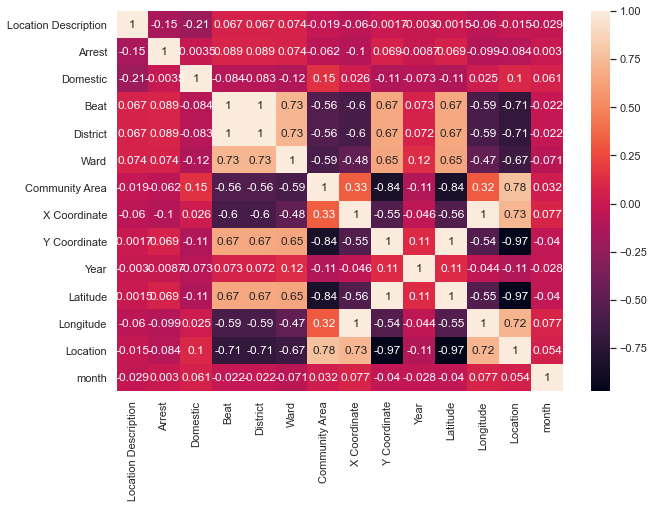

In [40]:
plt.figure(figsize=(10,7))
sns.heatmap(corelation,annot=True)

In [41]:
# month week day have low correlation they isn't effect our results so we drop them
# since beat have high correlation with district so we drop beat
# and X cordinate have high correlation with longitube and Y cordinate with latitude and location so we drop longitude and latitude

selected_cols=['Location Description','Arrest','Domestic','Beat','Ward','Community Area','Year','X Coordinate','Y Coordinate','Location']


In [42]:
X=cp_crime[selected_cols]
Y=cp_crime['crimeType']

In [43]:
Y=Y.astype(int)
Y.dtype

dtype('int32')

In [44]:
for c in selected_cols:
    print(f'{c}:{len(cp_crime[c].unique())}')


Location Description:36
Arrest:2
Domestic:2
Beat:192
Ward:49
Community Area:65
Year:3
X Coordinate:376
Y Coordinate:375
Location:378


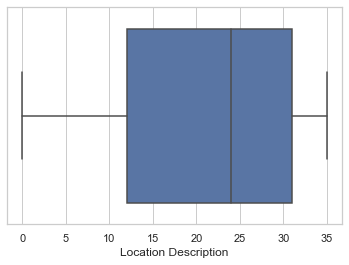

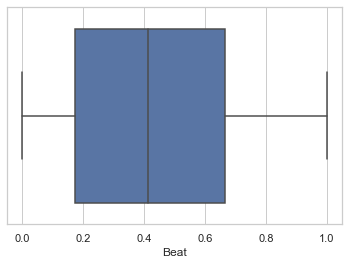

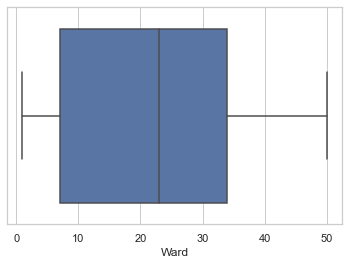

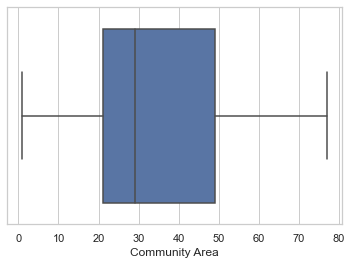

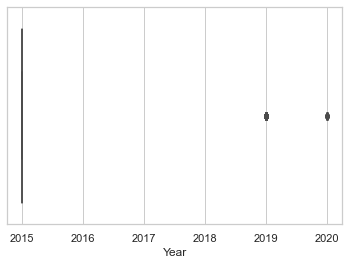

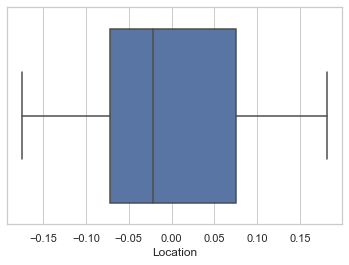

In [45]:
sns.set_theme(style="whitegrid")
selected_cols=['Location Description','Arrest','Domestic','Beat','Ward','Community Area','Year','X Coordinate','Y Coordinate','Location']      
sns.boxplot(x=cp_crime['Location Description'])
plt.show()
sns.boxplot(x=cp_crime['Beat'])
plt.show()
sns.boxplot(x=cp_crime['Ward'])
plt.show()
sns.boxplot(x=cp_crime['Community Area'])
plt.show()
sns.boxplot(x=cp_crime['Year'])
plt.show()
sns.boxplot(x=cp_crime['Location'])
plt.show()

In [46]:
#for xg boost

Y=Y.map({1:0,2:1,3:2,4:3})

In [47]:
# Tarining and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=0)

         Modelling

         Logistic regression

In [53]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
reg=LogisticRegression()
reg.fit(X_train,y_train)
y_pre = reg.predict(X_train)
y_pred = reg.predict(X_test)
print("The accuracy of the train data is ",accuracy_score(y_train,y_pre))
print("The accuracy of the test data is ",accuracy_score(y_test,y_pred))
print(" Test Data",classification_report(y_test,y_pred))
print(" Train Data",classification_report(y_train,y_pre))

The accuracy of the train data is  0.41375
The accuracy of the test data is  0.385
 Test Data               precision    recall  f1-score   support

           0       0.33      0.57      0.42       228
           1       0.44      0.57      0.49       308
           2       0.00      0.00      0.00       185
           3       1.00      0.03      0.05        79

    accuracy                           0.38       800
   macro avg       0.44      0.29      0.24       800
weighted avg       0.36      0.39      0.31       800

 Train Data               precision    recall  f1-score   support

           0       0.39      0.60      0.47      1083
           1       0.44      0.58      0.50      1143
           2       0.00      0.00      0.00       659
           3       1.00      0.03      0.07       315

    accuracy                           0.41      3200
   macro avg       0.46      0.30      0.26      3200
weighted avg       0.39      0.41      0.34      3200



C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


        KNeighborsClassifier 

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pre = knn.predict(X_train)
y_pred = knn.predict(X_test)
print("The accuracy of the train data is ",accuracy_score(y_train,y_pre))
print("The accuracy of the test data is ",accuracy_score(y_test,y_pred))
print(" Test Data",classification_report(y_test,y_pred))
print(" Train Data",classification_report(y_train,y_pre))

The accuracy of the train data is  0.998125
The accuracy of the test data is  0.9925
 Test Data               precision    recall  f1-score   support

           0       0.99      1.00      0.99       228
           1       1.00      0.99      1.00       308
           2       1.00      0.98      0.99       185
           3       0.98      1.00      0.99        79

    accuracy                           0.99       800
   macro avg       0.99      0.99      0.99       800
weighted avg       0.99      0.99      0.99       800

 Train Data               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1083
           1       1.00      1.00      1.00      1143
           2       1.00      1.00      1.00       659
           3       0.99      1.00      1.00       315

    accuracy                           1.00      3200
   macro avg       1.00      1.00      1.00      3200
weighted avg       1.00      1.00      1.00      3200



          Hyper parameter Tuning 

Text(0, 0.5, 'accuracy')

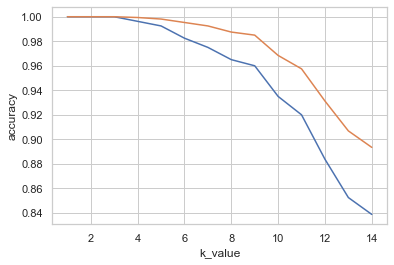

In [56]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pre = knn.predict(X_train)
y_pred = knn.predict(X_test)
scores_list_train = []
scores_list_test=[]
range_k = range(1,15)
for k in range_k:
        classifier = KNeighborsClassifier(n_neighbors=k)
        classifier.fit(X_train, y_train)
        y_pre = classifier.predict(X_train)
        scores_list_test.append(accuracy_score(y_train,y_pre))
        y_pred = classifier.predict(X_test)
        scores_list_train.append(accuracy_score(y_test,y_pred))
        
a=pd.DataFrame(scores_list_test,scores_list_train)
plt.plot(range_k,scores_list_train)
plt.plot(range_k,scores_list_test)
plt.xlabel("k_value")
plt.ylabel("accuracy")

In [57]:
from sklearn.model_selection import GridSearchCV
knn=KNeighborsClassifier(n_jobs=-1,n_neighbors=7)
weights=['uniform','distance']
algorithm='auto',
leaf_size=30,
p=[1,2]
n_jobs=-1,
param_grid={'p':p,'weights':weights}
Grid_mode=GridSearchCV(knn,param_grid,cv=5,scoring= 'accuracy')
Grid_mode.fit(X_train,y_train)
print(Grid_mode.best_params_)
y_pre = Grid_mode.predict(X_train)
y_pred = Grid_mode.predict(X_test)
print("The accuracy of the train data is ",accuracy_score(y_train,y_pre))
print("The accuracy of the test data is ",accuracy_score(y_test,y_pred))
print(" Test Data",classification_report(y_test,y_pred))
print(" Train Data",classification_report(y_train,y_pre))

{'p': 1, 'weights': 'distance'}
The accuracy of the train data is  1.0
The accuracy of the test data is  1.0
 Test Data               precision    recall  f1-score   support

           0       1.00      1.00      1.00       228
           1       1.00      1.00      1.00       308
           2       1.00      1.00      1.00       185
           3       1.00      1.00      1.00        79

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

 Train Data               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1083
           1       1.00      1.00      1.00      1143
           2       1.00      1.00      1.00       659
           3       1.00      1.00      1.00       315

    accuracy                           1.00      3200
   macro avg       1.00      1.00      1.00      3200
weighted avg       1.00      1.00      1.00      3200

             Gradient Boost 

In [58]:
from sklearn.ensemble import GradientBoostingClassifier
GDBclf = GradientBoostingClassifier()
GDBclf.fit(X_train, y_train)
y_pre = GDBclf.predict(X_train)
y_pred = GDBclf.predict(X_test)
print("The accuracy of the train data is ",accuracy_score(y_train,y_pre))
print("The accuracy of the test data is ",accuracy_score(y_test,y_pred))
print(" Test Data",classification_report(y_test,y_pred))
print(" Train Data",classification_report(y_train,y_pre))

The accuracy of the train data is  0.9246875
The accuracy of the test data is  0.90375
 Test Data               precision    recall  f1-score   support

           0       0.83      0.95      0.88       228
           1       0.93      0.94      0.94       308
           2       0.93      0.78      0.85       185
           3       1.00      0.92      0.96        79

    accuracy                           0.90       800
   macro avg       0.92      0.90      0.91       800
weighted avg       0.91      0.90      0.90       800

 Train Data               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1083
           1       0.94      0.94      0.94      1143
           2       0.95      0.84      0.89       659
           3       1.00      0.90      0.95       315

    accuracy                           0.92      3200
   macro avg       0.94      0.91      0.93      3200
weighted avg       0.93      0.92      0.92      3200



              Hyper Parmeter tuning

Text(0, 0.5, 'accuracy')

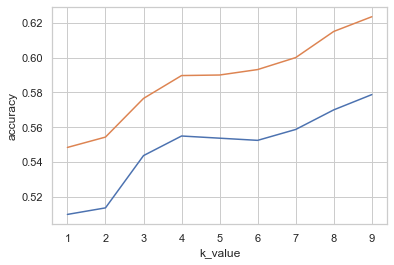

In [59]:
scores_list_train = []
scores_list_test=[]
range_k = np.arange(1,10,1)
for k in range_k:
        classifier =  GradientBoostingClassifier(n_estimators=k)
        classifier.fit(X_train, y_train)
        y_pre = classifier.predict(X_train)
        scores_list_test.append(accuracy_score(y_train,y_pre))
        y_pred = classifier.predict(X_test)
        scores_list_train.append(accuracy_score(y_test,y_pred))
        
a=pd.DataFrame(scores_list_test,scores_list_train)
plt.plot(range_k,scores_list_train)
plt.plot(range_k,scores_list_test)
plt.xlabel("k_value")
plt.ylabel("accuracy")

In [60]:
from sklearn.ensemble import GradientBoostingClassifier
GDBclf = GradientBoostingClassifier(n_estimators=8)
GDBclf.fit(X_train, y_train)
y_pre = GDBclf.predict(X_train)
y_pred = GDBclf.predict(X_test)
print("The accuracy of the train data is ",accuracy_score(y_train,y_pre))
print("The accuracy of the test data is ",accuracy_score(y_test,y_pred))
print(" Test Data",classification_report(y_test,y_pred))
print(" Train Data",classification_report(y_train,y_pre))

The accuracy of the train data is  0.615
The accuracy of the test data is  0.57
 Test Data               precision    recall  f1-score   support

           0       0.49      0.91      0.63       228
           1       0.64      0.70      0.67       308
           2       1.00      0.12      0.21       185
           3       1.00      0.11      0.20        79

    accuracy                           0.57       800
   macro avg       0.78      0.46      0.43       800
weighted avg       0.71      0.57      0.51       800

 Train Data               precision    recall  f1-score   support

           0       0.55      0.93      0.69      1083
           1       0.66      0.71      0.68      1143
           2       1.00      0.17      0.29       659
           3       1.00      0.13      0.24       315

    accuracy                           0.61      3200
   macro avg       0.80      0.48      0.48      3200
weighted avg       0.73      0.61      0.56      3200

